In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


# Load prepared data

In [2]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


## 55 fmap mean

In [14]:
arr = [4, 6, 8, 10, 12]
col = []
for i in range(len(arr)):
    for j in range(1, 12):
        name = str(arr[i])+'_'+str(j+1)+'m'+str(j)
        col.append(name)

In [15]:
file_name = save_path+"fmap_mean_55.txt"
columns = ['exp', 'mini_exp', 'i', 'j', 'k']
for i in range(len(col)): 
    columns.append(col[i])
columns.append('theory')
data = np.loadtxt(file_name);

In [16]:
df_55 = pd.DataFrame(data, columns=columns)
df_55 = df_55.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df_55

,exp,mini_exp,i,j,k,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,...,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split data

## Data 1. fmap mean all experiments

In [6]:
X = df.iloc[:, 5:-1].values 
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [7]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 5)
(3244032,)
(2270822, 5)
(2270822,)
(973210, 5)
(973210,)


## Data2: One experiment

In [8]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [9]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
901115,0.0,0.0,0.0,0.0,0.0
901116,0.0,0.0,0.0,0.0,0.0
901117,0.0,0.0,0.0,0.0,0.0
901118,0.0,0.0,0.0,0.0,0.0


In [10]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [11]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data3: 55 fmap mean

In [20]:
df_55.iloc[:, 5:-1]

,4_2m1,4_3m2,4_4m3,4_5m4,4_6m5,4_7m6,4_8m7,4_9m8,4_10m9,4_11m10,...,12_3m2,12_4m3,12_5m4,12_6m5,12_7m6,12_8m7,12_9m8,12_10m9,12_11m10,12_12m11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = df_55.iloc[:, 5:-1].values  
y = df_55['theory'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [22]:
print(X.shape)
print(y.shape)
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(3244032, 55)
(3244032,)
(2270822, 55)
(2270822,)
(973210, 55)
(973210,)


## Data4: None zero

In [23]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [24]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
30760,36,1,7,32,40,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,1,7,32,41,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,1,7,32,42,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,1,7,32,43,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,1,7,33,15,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
3213651,38,6,36,37,19,-75.107628,-68.905487,-75.427681,-82.513771,-79.595093,4.270157
3213652,38,6,36,37,20,76.162445,81.230690,75.100578,66.783051,69.944969,4.636876
3213653,38,6,36,37,21,196.146164,202.442993,194.505157,186.740524,189.227448,5.051056
3213660,38,6,36,37,28,749.112549,763.357300,750.066223,730.827637,739.551208,13.024664


In [25]:
X = df_nonzero.iloc[:, 5:-1].values
y = df_nonzero['theory'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [26]:
print(X.shape)
print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(622760, 5)
(622760,)
(435932, 5)
(435932,)
(186828, 5)
(186828,)


## Data5: Normalize one experiment

In [117]:
scaler = MinMaxScaler()
# transform data
X5_train = scaler.fit_transform(X2_train)
X5_test = scaler.fit_transform(X2_test)

## Data6: Scale one experiment

In [118]:
scaler = StandardScaler()
# transform data
X6_train = scaler.fit_transform(X2_train)
X6_test = scaler.fit_transform(X2_test)

# Neural Network

## Find out best layer and units

In [43]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


In [109]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [172]:
def create_nn(layer_size, unit_size):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_size, activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_size, activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [203]:
max_layer = 11
max_unit = 11
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
for i in range(1, max_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    for j in range(1, max_unit):
        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_nn(i, j)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
    
    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Layer:1 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 27s 949us/step - loss: 1622.7350 - accuracy: 0.0637 - val_loss: 59.0192 - val_accuracy: 0.0000e+00
Epoch 2/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.6579 - accuracy: 1.2096e-04 - val_loss: 58.8350 - val_accuracy: 1.8865e-04
Epoch 3/100
28160/28160 [==============================] - 26s 927us/step - loss: 55.9312 - accuracy: 1.2984e-04 - val_loss: 56.4048 - val_accuracy: 0.0000e+00
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 56.0702 - accuracy: 1.0542e-04 - val_loss: 60.1063 - val_accuracy: 1.7756e-04
Epoch 5/100
28160/28160 [==============================] - 26s 926us/step - loss: 55.7474 - accuracy: 1.1097e-04 - val_loss: 61.5973 - val_accuracy: 0.0000e+00
Epoch 6/100
28160/28160 [==============================] - 26s 930us/step - loss: 55.7187 - accuracy: 1.0875e-04 - val_loss: 56.2519 - val_accuracy: 1.8311e-04
Epoch 7/100
281

28160/28160 [==============================] - 42s 1ms/step - loss: 2568.7761 - accuracy: 0.6155 - val_loss: 57.8404 - val_accuracy: 1.7756e-04
Epoch 2/100
28160/28160 [==============================] - 43s 2ms/step - loss: 56.2207 - accuracy: 1.1874e-04 - val_loss: 54.0337 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 43s 2ms/step - loss: 55.5551 - accuracy: 1.1319e-04 - val_loss: 69.8013 - val_accuracy: 1.9420e-04
Epoch 4/100
28160/28160 [==============================] - 44s 2ms/step - loss: 55.5166 - accuracy: 1.1319e-04 - val_loss: 58.3425 - val_accuracy: 0.0000e+00
Epoch 5/100
28160/28160 [==============================] - 46s 2ms/step - loss: 55.5895 - accuracy: 1.1541e-04 - val_loss: 56.7904 - val_accuracy: 1.7756e-04
Epoch 6/100
28160/28160 [==============================] - 44s 2ms/step - loss: 55.8221 - accuracy: 1.0875e-04 - val_loss: 55.1708 - val_accuracy: 0.0000e+00
Epoch 7/100
28160/28160 [==============================] - 44s 2ms

Epoch 6/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.7177 - accuracy: 1.1874e-04 - val_loss: 55.5720 - val_accuracy: 0.0000e+00
Epoch 7/100
28160/28160 [==============================] - 24s 853us/step - loss: 55.5480 - accuracy: 1.0875e-04 - val_loss: 54.5475 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 24s 852us/step - loss: 55.3381 - accuracy: 1.1430e-04 - val_loss: 58.7836 - val_accuracy: 2.7743e-05
Epoch 9/100
28160/28160 [==============================] - 24s 850us/step - loss: 55.4413 - accuracy: 1.1430e-04 - val_loss: 59.4935 - val_accuracy: 1.8865e-04
Epoch 10/100
28160/28160 [==============================] - 24s 854us/step - loss: 55.5529 - accuracy: 1.1763e-04 - val_loss: 55.7116 - val_accuracy: 5.5487e-06
Epoch 11/100
28160/28160 [==============================] - 24s 858us/step - loss: 55.7188 - accuracy: 1.1652e-04 - val_loss: 56.3565 - val_accuracy: 5.5487e-06
Epoch 12/100
28160/28160 [============

28160/28160 [==============================] - 24s 869us/step - loss: 55.7206 - accuracy: 1.1208e-04 - val_loss: 56.5763 - val_accuracy: 1.6646e-05
Epoch 7/100
28160/28160 [==============================] - 25s 876us/step - loss: 55.5726 - accuracy: 1.2096e-04 - val_loss: 54.1778 - val_accuracy: 0.0000e+00
Epoch 8/100
28160/28160 [==============================] - 25s 870us/step - loss: 55.6499 - accuracy: 1.1097e-04 - val_loss: 58.5910 - val_accuracy: 1.6646e-04
Epoch 9/100
28160/28160 [==============================] - 25s 870us/step - loss: 55.7477 - accuracy: 1.1430e-04 - val_loss: 55.9971 - val_accuracy: 0.0000e+00
Epoch 10/100
28160/28160 [==============================] - 24s 865us/step - loss: 55.5321 - accuracy: 1.2096e-04 - val_loss: 58.9878 - val_accuracy: 1.8311e-04
Epoch 11/100
5632/5632 [==============================] - 4s 720us/step - loss: 59.1094 - accuracy: 0.0000e+00
##### Layer:2 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 26s 901us/step

28160/28160 [==============================] - 28s 1ms/step - loss: 28.1126 - accuracy: 0.8113 - val_loss: 29.2738 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 26s 911us/step - loss: 27.1445 - accuracy: 0.8113 - val_loss: 31.4884 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 26s 916us/step - loss: 26.7425 - accuracy: 0.8113 - val_loss: 26.7324 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 25.4802 - accuracy: 0.8113 - val_loss: 25.4726 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 26s 914us/step - loss: 25.7452 - accuracy: 0.8114 - val_loss: 24.7987 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 913us/step - loss: 24.0829 - accuracy: 0.8114 - val_loss: 34.7002 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.8517 - accur

Epoch 12/100
28160/28160 [==============================] - 26s 909us/step - loss: 24.5357 - accuracy: 0.8114 - val_loss: 23.3538 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 26s 907us/step - loss: 24.2724 - accuracy: 0.8114 - val_loss: 23.3102 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 26s 909us/step - loss: 23.1696 - accuracy: 0.8114 - val_loss: 26.1382 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 26s 921us/step - loss: 23.2271 - accuracy: 0.8114 - val_loss: 19.3853 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 26s 913us/step - loss: 22.1799 - accuracy: 0.8114 - val_loss: 29.7477 - val_accuracy: 0.8114
Epoch 17/100
28160/28160 [==============================] - 26s 909us/step - loss: 22.3239 - accuracy: 0.8113 - val_loss: 19.6269 - val_accuracy: 0.8112
Epoch 18/100
28160/28160 [==============================] - 26s 911us/step - loss:

28160/28160 [==============================] - 28s 986us/step - loss: 23.4250 - accuracy: 0.8114 - val_loss: 22.8616 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 28s 989us/step - loss: 23.0010 - accuracy: 0.8114 - val_loss: 29.2213 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 28s 982us/step - loss: 22.6916 - accuracy: 0.8113 - val_loss: 20.9387 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 28s 993us/step - loss: 22.1041 - accuracy: 0.8113 - val_loss: 43.0577 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 28s 987us/step - loss: 22.6968 - accuracy: 0.8113 - val_loss: 22.8271 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 28s 990us/step - loss: 22.0752 - accuracy: 0.8113 - val_loss: 19.5308 - val_accuracy: 0.8114
Epoch 17/100
28160/28160 [==============================] - 28s 982us/step - loss: 21.8521 - ac

28160/28160 [==============================] - 26s 908us/step - loss: 27.5573 - accuracy: 0.8114 - val_loss: 37.9400 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 26s 909us/step - loss: 25.5927 - accuracy: 0.8114 - val_loss: 24.7688 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 929us/step - loss: 24.3192 - accuracy: 0.8114 - val_loss: 29.1826 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 26s 919us/step - loss: 23.5415 - accuracy: 0.8114 - val_loss: 22.6640 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 926us/step - loss: 23.3347 - accuracy: 0.8114 - val_loss: 21.6521 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 28s 981us/step - loss: 23.1001 - accuracy: 0.8114 - val_loss: 24.5581 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 28s 988us/step - loss: 24.0384 - accu

Epoch 13/100
28160/28160 [==============================] - 26s 935us/step - loss: 12.6412 - accuracy: 0.7673 - val_loss: 11.5847 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.1391 - accuracy: 0.7693 - val_loss: 11.6681 - val_accuracy: 0.8112
Epoch 15/100
5632/5632 [==============================] - 4s 749us/step - loss: 11.4569 - accuracy: 0.8112
##### Layer:3 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 26s 929us/step - loss: 215.3745 - accuracy: 0.1395 - val_loss: 37.8215 - val_accuracy: 1.6646e-05
Epoch 2/100
28160/28160 [==============================] - 26s 928us/step - loss: 27.1999 - accuracy: 0.5950 - val_loss: 23.4988 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 27s 967us/step - loss: 20.4521 - accuracy: 0.8114 - val_loss: 23.4609 - val_accuracy: 0.8114
Epoch 4/100
28160/28160 [==============================] - 26s 929us/step - loss: 19.1715 - accurac

28160/28160 [==============================] - 27s 942us/step - loss: 13.8986 - accuracy: 0.8110 - val_loss: 14.8802 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.7027 - accuracy: 0.8114 - val_loss: 14.3903 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 26s 933us/step - loss: 13.4343 - accuracy: 0.8114 - val_loss: 14.0424 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 935us/step - loss: 13.2364 - accuracy: 0.8097 - val_loss: 14.2382 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 27s 962us/step - loss: 12.9927 - accuracy: 0.8112 - val_loss: 14.1223 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 26s 932us/step - loss: 13.1283 - accuracy: 0.8107 - val_loss: 16.6140 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 26s 933us/step - loss: 12.7784 - accur

Epoch 6/100
28160/28160 [==============================] - 26s 940us/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6975 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 27s 941us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 27s 942us/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 27s 945us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6967 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 27s 943us/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.7008 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 755us/step - loss: 54.6970 - accuracy: 5.5487e-06
##### Layer:4 Unit:2 #####
Epoch 1/100
28160/28160 [==============================] - 27

Epoch 10/100
28160/28160 [==============================] - 27s 961us/step - loss: 12.2540 - accuracy: 0.8106 - val_loss: 11.5491 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 959us/step - loss: 12.3361 - accuracy: 0.8112 - val_loss: 13.3024 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7930 - accuracy: 0.8106 - val_loss: 11.4537 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.7273 - accuracy: 0.8112 - val_loss: 11.8885 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 958us/step - loss: 11.5686 - accuracy: 0.8114 - val_loss: 11.1128 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 27s 953us/step - loss: 11.2863 - accuracy: 0.8114 - val_loss: 11.5168 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 27s 961us/step - loss:

28160/28160 [==============================] - 27s 955us/step - loss: 14.2748 - accuracy: 0.8112 - val_loss: 11.8781 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 27s 957us/step - loss: 12.1761 - accuracy: 0.8112 - val_loss: 11.5165 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 27s 956us/step - loss: 12.0257 - accuracy: 0.8113 - val_loss: 13.7924 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 959us/step - loss: 11.9663 - accuracy: 0.8113 - val_loss: 11.3742 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 27s 954us/step - loss: 11.9320 - accuracy: 0.8113 - val_loss: 11.0307 - val_accuracy: 0.8112
Epoch 13/100
28160/28160 [==============================] - 27s 955us/step - loss: 11.6779 - accuracy: 0.8113 - val_loss: 10.7635 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 27s 960us/step - loss: 11.7147 - acc

28160/28160 [==============================] - 28s 989us/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7009 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 28s 986us/step - loss: 54.6990 - accuracy: 5.5487e-06 - val_loss: 54.6981 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 28s 989us/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6977 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7019 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] -

28160/28160 [==============================] - 28s 987us/step - loss: 11.1486 - accuracy: 0.8114 - val_loss: 10.5247 - val_accuracy: 0.8114
Epoch 17/100
5632/5632 [==============================] - 4s 776us/step - loss: 10.2826 - accuracy: 0.8112
##### Layer:5 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 28s 997us/step - loss: 31.2494 - accuracy: 0.8112 - val_loss: 22.9585 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 28s 987us/step - loss: 17.1868 - accuracy: 0.8112 - val_loss: 18.0133 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 28s 988us/step - loss: 17.6228 - accuracy: 0.8112 - val_loss: 16.8341 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 28s 986us/step - loss: 14.2042 - accuracy: 0.8112 - val_loss: 16.4548 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 28s 991us/step - loss: 14.6130 - accuracy: 0.8097 - val_los

28160/28160 [==============================] - 29s 1ms/step - loss: 12.7175 - accuracy: 0.8111 - val_loss: 10.7934 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 28s 1ms/step - loss: 12.1317 - accuracy: 0.8100 - val_loss: 10.7823 - val_accuracy: 0.8114
Epoch 6/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9225 - accuracy: 0.8106 - val_loss: 13.1778 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9791 - accuracy: 0.8064 - val_loss: 12.3471 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.8532 - accuracy: 0.8098 - val_loss: 11.2073 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 12.1065 - accuracy: 0.8097 - val_loss: 11.0687 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9941 - accuracy: 0.8097 - va

28160/28160 [==============================] - 29s 1ms/step - loss: 19.4404 - accuracy: 0.8092 - val_loss: 14.8647 - val_accuracy: 0.8114
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.5127 - accuracy: 0.7950 - val_loss: 26.4252 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.1695 - accuracy: 0.8101 - val_loss: 13.6262 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 18.9767 - accuracy: 0.8103 - val_loss: 13.5191 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.5585 - accuracy: 0.8110 - val_loss: 11.9598 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 19.6823 - accuracy: 0.7886 - val_loss: 40.9895 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.9787 - accuracy: 0.8109 - va

Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.5918 - accuracy: 0.7903 - val_loss: 12.1188 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.0725 - accuracy: 0.8065 - val_loss: 15.6989 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.1823 - accuracy: 0.8096 - val_loss: 26.6462 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.2796 - accuracy: 0.8106 - val_loss: 11.4260 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1569 - accuracy: 0.8093 - val_loss: 18.7560 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 15.3967 - accuracy: 0.8094 - val_loss: 12.0654 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.9484 - accuracy

Epoch 7/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7154 - accuracy: 0.8112 - val_loss: 11.2682 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.5396 - accuracy: 0.8112 - val_loss: 10.5479 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.3986 - accuracy: 0.8112 - val_loss: 10.4961 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 999us/step - loss: 11.5263 - accuracy: 0.8112 - val_loss: 10.7674 - val_accuracy: 0.8112
Epoch 11/100
5632/5632 [==============================] - 4s 761us/step - loss: 11.1607 - accuracy: 0.8112
##### Layer:7 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.8693 - accuracy: 0.0190 - val_loss: 54.6972 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 28s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-0

28160/28160 [==============================] - 29s 1ms/step - loss: 13.1218 - accuracy: 0.8111 - val_loss: 12.4156 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.1155 - accuracy: 0.8112 - val_loss: 13.9366 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.2753 - accuracy: 0.8113 - val_loss: 13.5692 - val_accuracy: 0.8114
Epoch 14/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.6608 - accuracy: 0.8112 - val_loss: 14.5334 - val_accuracy: 0.8114
Epoch 15/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.3126 - accuracy: 0.8107 - val_loss: 11.0063 - val_accuracy: 0.8112
Epoch 16/100
28160/28160 [==============================] - 29s 1ms/step - loss: 13.1465 - accuracy: 0.8111 - val_loss: 14.6404 - val_accuracy: 0.8114
Epoch 17/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.2015 - accuracy: 0.8111

Epoch 4/100
28160/28160 [==============================] - 29s 1ms/step - loss: 14.5050 - accuracy: 0.8111 - val_loss: 11.1388 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.1807 - accuracy: 0.8110 - val_loss: 12.0496 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6696 - accuracy: 0.8111 - val_loss: 10.8371 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4133 - accuracy: 0.8110 - val_loss: 10.6995 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.2951 - accuracy: 0.8108 - val_loss: 11.3119 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.3853 - accuracy: 0.8108 - val_loss: 9.8923 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.2056 - accuracy: 

28160/28160 [==============================] - 30s 1ms/step - loss: 18.3951 - accuracy: 0.7998 - val_loss: 21.2289 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 30s 1ms/step - loss: 16.9268 - accuracy: 0.8112 - val_loss: 20.5725 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 30s 1ms/step - loss: 16.6695 - accuracy: 0.8105 - val_loss: 19.4249 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 30s 1ms/step - loss: 16.0928 - accuracy: 0.8085 - val_loss: 20.0275 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.6455 - accuracy: 0.8112 - val_loss: 16.7548 - val_accuracy: 0.8112
Epoch 13/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.7261 - accuracy: 0.8082 - val_loss: 16.8221 - val_accuracy: 0.8112
Epoch 14/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.0165 - accuracy: 0.8112 

28160/28160 [==============================] - 30s 1ms/step - loss: 12.8222 - accuracy: 0.8113 - val_loss: 12.5527 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.3497 - accuracy: 0.8113 - val_loss: 12.3709 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.2229 - accuracy: 0.8112 - val_loss: 12.4372 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.0755 - accuracy: 0.8112 - val_loss: 11.2684 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.6671 - accuracy: 0.8112 - val_loss: 11.0530 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.5910 - accuracy: 0.8113 - val_loss: 10.5131 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 30s 1ms/step - loss: 11.3253 - accuracy: 0.8112 - val

Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.0623 - accuracy: 0.8035 - val_loss: 27.8250 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 30s 1ms/step - loss: 12.8291 - accuracy: 0.8030 - val_loss: 12.5160 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7920 - accuracy: 0.8047 - val_loss: 14.6351 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1092 - accuracy: 0.8029 - val_loss: 12.0661 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 34s 1ms/step - loss: 11.8680 - accuracy: 0.8024 - val_loss: 10.5607 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 11.8273 - accuracy: 0.7993 - val_loss: 11.0123 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 35s 1ms/step - loss: 12.2658 - accuracy: 

28160/28160 [==============================] - 34s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6967 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 33s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.7013 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 33s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6979 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 33s 1ms/step - loss: 54.6992 - accuracy: 5.5487e-06 - val_loss: 54.6981 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 34s 1ms/step - loss: 54.6991 - accuracy: 5.5487e-06 - val_loss: 54.6977 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 5s 824us/step - loss: 54.7014 - accuracy: 5.5487e-06
##### Layer:9 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 34s 1ms/step - loss: 32.

28160/28160 [==============================] - 32s 1ms/step - loss: 11.3449 - accuracy: 0.8112 - val_loss: 10.9629 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.3685 - accuracy: 0.8112 - val_loss: 10.2441 - val_accuracy: 0.8112
Epoch 13/100
5632/5632 [==============================] - 5s 802us/step - loss: 10.5168 - accuracy: 0.8112
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 20.1568 - accuracy: 0.8019 - val_loss: 13.2738 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.5765 - accuracy: 0.8049 - val_loss: 11.0895 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.9081 - accuracy: 0.8064 - val_loss: 12.2557 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 31s 1ms/step - loss: 11.8293 - accuracy: 0.8074 - val_loss: 10.1148 

28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6980 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6954 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7020 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7029 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 37s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.7027 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 35s 1ms/step - loss: 54.6999 - accuracy: 5.5487e-06 - val_loss: 54.7006 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 37s 1

Epoch 6/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.4397 - accuracy: 0.8113 - val_loss: 14.2656 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.6454 - accuracy: 0.8114 - val_loss: 11.2311 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 46s 2ms/step - loss: 12.8084 - accuracy: 0.8111 - val_loss: 11.3101 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.1541 - accuracy: 0.8112 - val_loss: 10.3025 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.2040 - accuracy: 0.8112 - val_loss: 10.3590 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 47s 2ms/step - loss: 11.0281 - accuracy: 0.8113 - val_loss: 11.1012 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 46s 2ms/step - loss: 10.9895 - accurac

5632/5632 [==============================] - 7s 1ms/step - loss: 10.4135 - accuracy: 0.8112
##### Layer:10 Unit:10 #####
Epoch 1/100
28160/28160 [==============================] - 50s 2ms/step - loss: 19.0625 - accuracy: 0.7974 - val_loss: 12.8110 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 47s 2ms/step - loss: 12.8810 - accuracy: 0.7994 - val_loss: 10.9691 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 47s 2ms/step - loss: 12.1369 - accuracy: 0.8049 - val_loss: 11.6094 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 45s 2ms/step - loss: 11.8238 - accuracy: 0.8097 - val_loss: 10.6415 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 45s 2ms/step - loss: 11.6894 - accuracy: 0.8103 - val_loss: 18.2353 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 46s 2ms/step - loss: 11.5027 - accuracy: 0.8110 - val_loss: 13.8959 - 

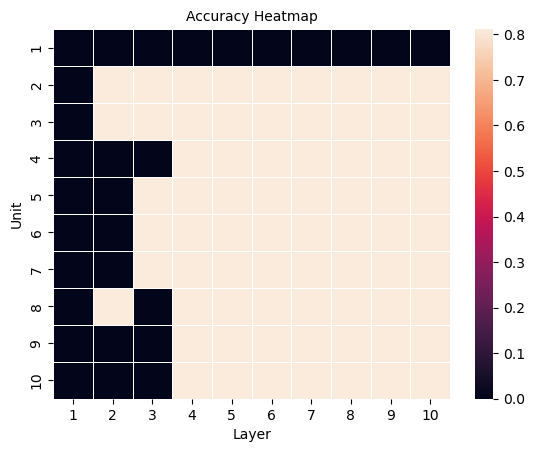

In [204]:
xlabels = range(1, max_layer)
ylabels = range(1, max_unit)
ax = sns.heatmap(acc_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Layer', fontsize=10)
ax.set_ylabel('Unit', fontsize=10)
plt.show()

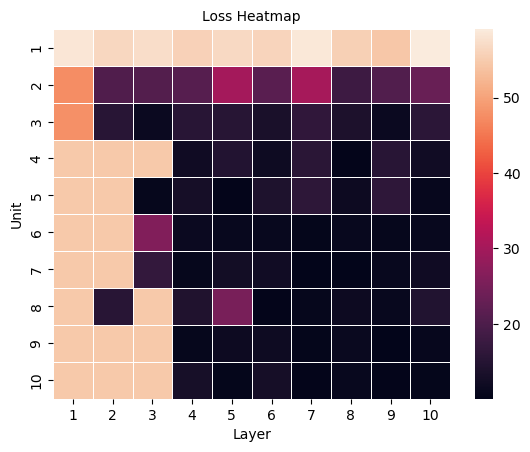

In [205]:
ax = sns.heatmap(loss_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Layer', fontsize=10)
ax.set_ylabel('Unit', fontsize=10)
plt.show()

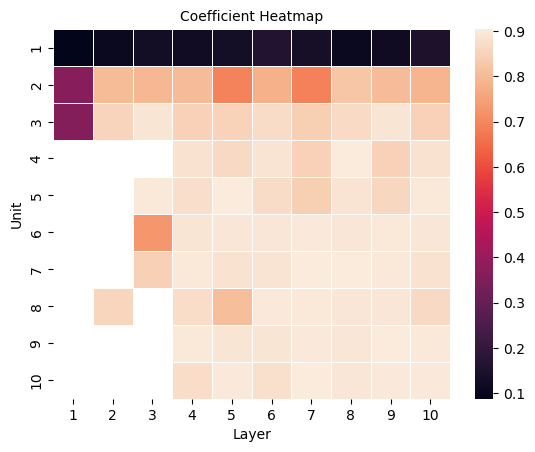

In [206]:
ax = sns.heatmap(coef_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Layer', fontsize=10)
ax.set_ylabel('Unit', fontsize=10)
plt.show()

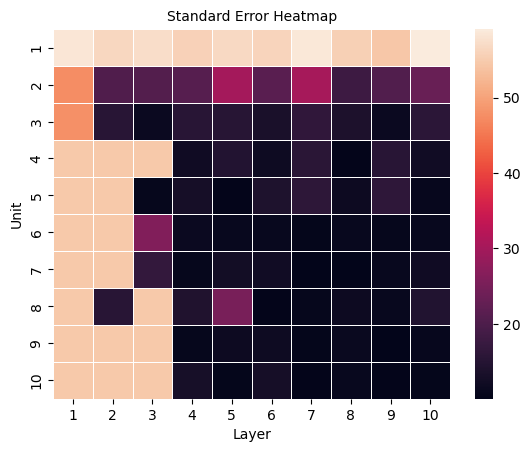

In [207]:
ax = sns.heatmap(loss_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Layer', fontsize=10)
ax.set_ylabel('Unit', fontsize=10)
plt.show()

## Find out Hyper paramater 

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [157]:
model2 = keras.Sequential()

model2.add(Dense(1, activation='relu', input_shape=(5,)))
model2.add(Dense(1, activation="linear"))

# model2.add(Dense(5, activation='relu', input_shape=(5,)))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7665, MSE 23.21, MAPE 0.9155, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7815, MSE 22.56, MAPE 0.9038, Accuracy 0.8112 

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7894, MSE 21.13, MAPE 0.8703, Accuracy 0.8112 => Best

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7786, MSE 22.19, MAPE 0.8877, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(1))
# # Coef 0.71174903, MSE 28.1933, MAPE 0.9055, Accuracy 0.8114


### BAD ###
# model2.add(Dense(100, activation='relu', input_shape=(5,)))
# model2.add(Dense(50, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.5541, MSE 38.85, MAPE 1.134, Accuracy 0.8112 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef None, MSE 56.06, MAPE 1.656, Accuracy 5.5487e-06 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7285, MSE 26.74, MAPE 1.5369, Accuracy 0.8114 => Bad

# model2.add(Dense(5, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1))
# # Coef 0.7833, MSE 21.68 MAPE 1.197, Accuracy 0.8112 

model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)


Epoch 1/100
 9015/28160 [========>.....................] - ETA: 16s - loss: 56.3059 - accuracy: 0.1151

KeyboardInterrupt: 

In [60]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 20s 697us/step
11.214849205358673
0.8891644970950675
5632/5632 [==============================] - 4s 680us/step
11.220028543186952
0.9035458755417451


In [106]:
arr = np.corrcoef(test_pred2.flatten(), y_test)

In [108]:
arr

array([[1.        , 0.89192917],
       [0.89192917, 1.        ]])

In [62]:
ev = model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 834us/step - loss: 11.2200 - accuracy: 0.8112


In [72]:
ev[1]

0.8112127184867859

In [364]:
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 10)                60        
                                                                 
 dense_128 (Dense)           (None, 10)                110       
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
 dense_130 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [365]:
history2.history

{'loss': [70.53611755371094,
  23.023168563842773,
  22.059120178222656,
  21.485179901123047,
  21.023574829101562,
  21.458295822143555,
  20.747465133666992,
  20.87920379638672,
  20.674291610717773,
  20.560890197753906,
  20.375850677490234],
 'accuracy': [0.8095003962516785,
  0.8013139367103577,
  0.7952991724014282,
  0.7956908941268921,
  0.7943170666694641,
  0.7915316224098206,
  0.8020529747009277,
  0.7983931303024292,
  0.7977461218833923,
  0.8100963234901428,
  0.8075761198997498],
 'val_loss': [31.34503936767578,
  23.02967071533203,
  23.319063186645508,
  22.255678176879883,
  22.685558319091797,
  22.644386291503906,
  22.474851608276367,
  22.245553970336914,
  23.826812744140625,
  23.19800567626953,
  21.347797393798828],
 'val_accuracy': [0.8113847374916077,
  0.8113847374916077,
  0.8113791942596436,
  0.8112071752548218,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112

## Plot

### Loss function (MSE)

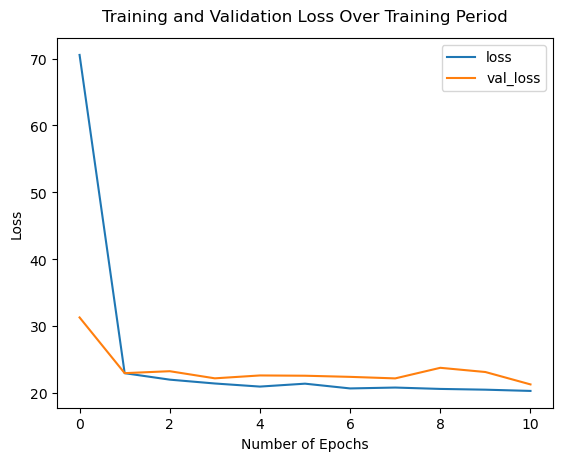

In [391]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

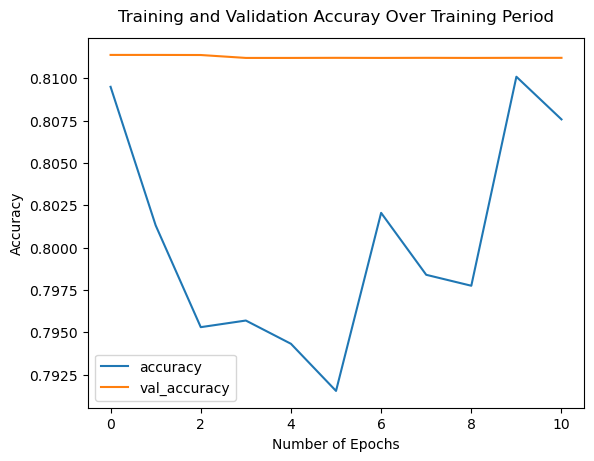

In [392]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.78695%, st_er: 0.001142%
y = 0.6185*x + 0.7269


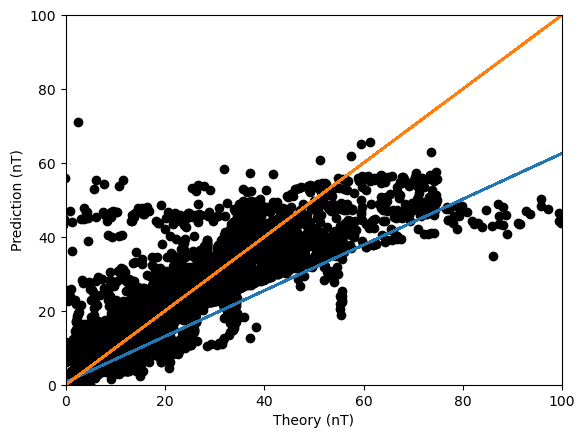

In [393]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [369]:
df_test['predict'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_82638/3293406254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred2


In [370]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

# MLPRegressor

In [63]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train, y_train)

In [64]:
regr.score(X_test, y_test)

0.7235479854252406

In [65]:
y_predict = regr.predict(X_test)

In [66]:
np.corrcoef(y_predict,y_test)

array([[1.        , 0.85849349],
       [0.85849349, 1.        ]])

## Data1: fmap means all experiments

In [89]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [90]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])

In [91]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))

70964/70964 [==============================] - 46s 654us/step
38.44056219993308
30413/30413 [==============================] - 19s 634us/step
46.3918535642208


In [92]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 24s 774us/step - loss: 46.3918 - accuracy: 0.8084


[46.39183807373047, 0.8084133863449097]

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [94]:
history.history

{'loss': [66.74281311035156,
  42.7500114440918,
  40.544212341308594,
  39.693603515625,
  39.23619079589844,
  38.74108123779297,
  38.47666549682617,
  38.391075134277344,
  38.123497009277344,
  37.7577018737793,
  37.48772048950195,
  37.3863639831543,
  37.14435577392578,
  36.87738037109375,
  36.861473083496094,
  36.89885711669922,
  36.669403076171875,
  36.781253814697266,
  36.794219970703125,
  36.69332504272461],
 'accuracy': [0.6189203858375549,
  0.5055169463157654,
  0.5752212405204773,
  0.6163825392723083,
  0.6622412204742432,
  0.7119814157485962,
  0.7424448132514954,
  0.7422818541526794,
  0.7424782514572144,
  0.7477217316627502,
  0.7512345910072327,
  0.7460505366325378,
  0.7511980533599854,
  0.7564943432807922,
  0.7597380876541138,
  0.7520034313201904,
  0.7701431512832642,
  0.7735141515731812,
  0.7702431082725525,
  0.7729403972625732],
 'val_loss': [51.241249084472656,
  47.92045211791992,
  44.79644012451172,
  45.1495475769043,
  48.113365173339844

## Plot

### Loss function (MSE)

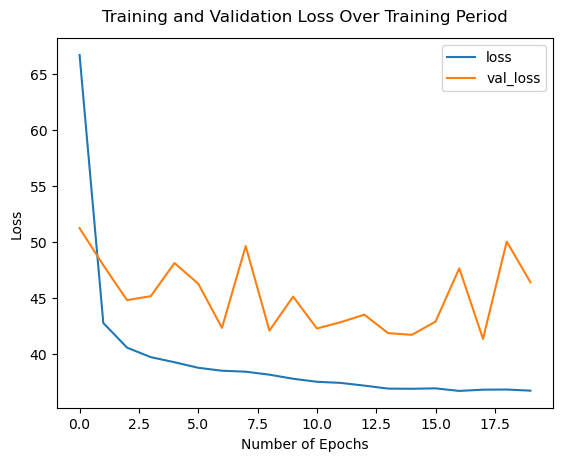

In [95]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

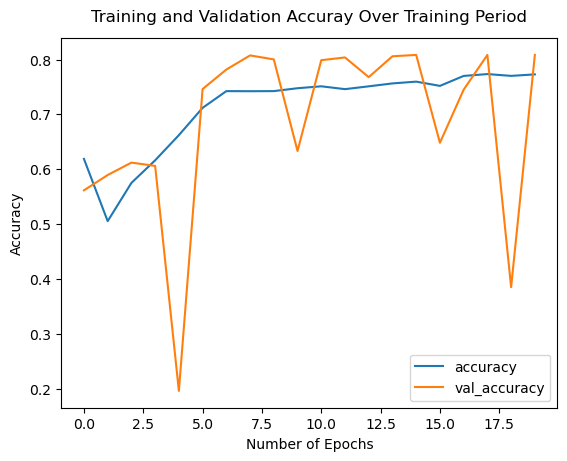

In [96]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

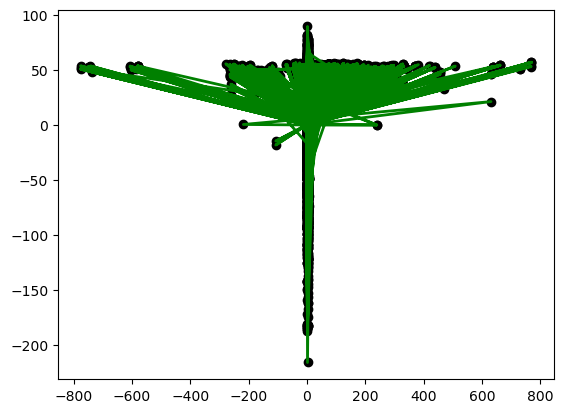

In [97]:
plt.scatter(y_test, test_pred,  color='black')
plt.plot(y_test, test_pred, color='green', linewidth=2)

In [ ]:
acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

## Data3: 55 fmap means

In [33]:
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

In [34]:
model3 = keras.Sequential()
model3.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model3.add(Dense(1))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [35]:
train_pred3 = model3.predict(X_train)
print(mse(train_pred3, y_train))
test_pred3 = model3.predict(X_test)
print(mse(test_pred3, y_test))

70964/70964 [==============================] - 45s 632us/step
68.77916304603048
30413/30413 [==============================] - 19s 627us/step
72.2654945878932


In [36]:
model3.evaluate(X_test, y_test)

30413/30413 [==============================] - 23s 741us/step - loss: 72.2655 - accuracy: 6.0624e-05


[72.2655258178711, 6.062411921448074e-05]

In [37]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                1180      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
history3.history

{'loss': [424.44866943359375,
  52.18746566772461,
  51.95429611206055,
  52.74146270751953,
  52.98725891113281,
  53.29958724975586,
  53.16404724121094,
  52.7490234375,
  50.758277893066406,
  52.65450668334961,
  51.552188873291016,
  52.617671966552734,
  53.788509368896484,
  51.86954116821289,
  54.698970794677734,
  53.814910888671875,
  54.32284927368164,
  53.93813705444336,
  60.74116897583008,
  58.160919189453125],
 'accuracy': [0.19938991963863373,
  0.05913321301341057,
  0.0845579281449318,
  0.22490622103214264,
  0.0676451101899147,
  0.1753215342760086,
  0.06831182539463043,
  0.14271968603134155,
  0.07882960140705109,
  0.05445164814591408,
  0.03953986614942551,
  0.05900947004556656,
  0.06043890863656998,
  0.04243529587984085,
  0.07458136230707169,
  0.0736151933670044,
  0.054844897240400314,
  0.07133672386407852,
  0.0954161062836647,
  0.09563849866390228],
 'val_loss': [55.899784088134766,
  88.07706451416016,
  51.993961334228516,
  53.2925910949707,
 

## Plot

### Loss function (MSE)

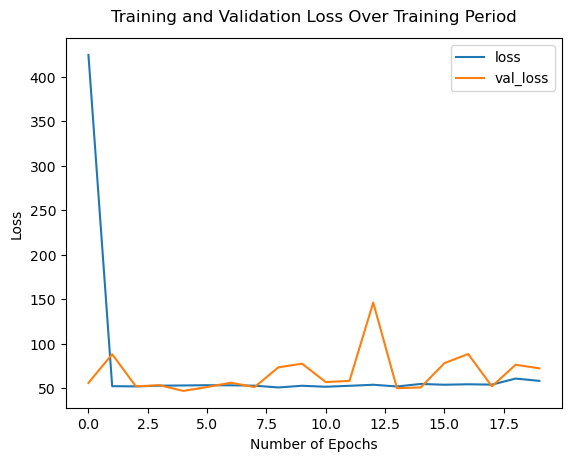

In [39]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

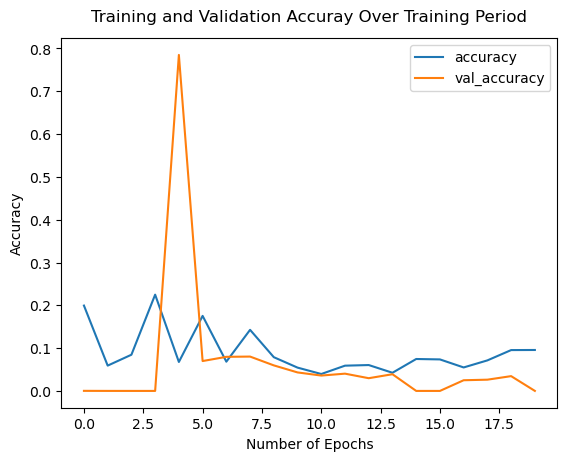

In [40]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

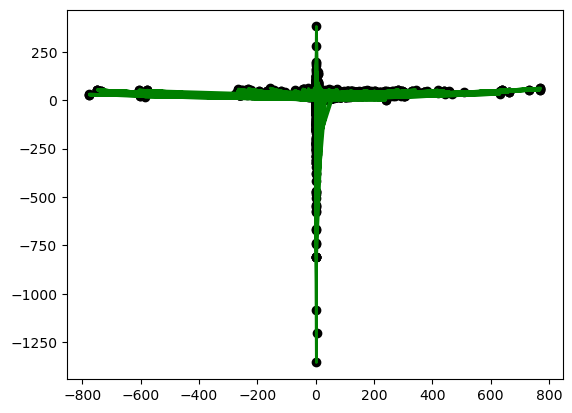

In [41]:
plt.scatter(y_test, test_pred3,  color='black')
plt.plot(y_test, test_pred3, color='green', linewidth=2)

## Data4: None zero

In [39]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [28]:
model4 = keras.Sequential()
model4.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model4.add(Dense(1))
#
model4.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=20, validation_data=[X_test, y_test])


2022-10-26 12:02:18.273343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
13623/13623 [==============================] - 17s 1ms/step - loss: 775.6888 - accuracy: 5.0696e-04 - val_loss: 280.3866 - val_accuracy: 9.8486e-04
Epoch 2/20
13623/13623 [==============================] - 16s 1ms/step - loss: 254.4488 - accuracy: 5.9642e-04 - val_loss: 239.9096 - val_accuracy: 4.8173e-05
Epoch 3/20
13623/13623 [==============================] - 16s 1ms/step - loss: 244.3139 - accuracy: 6.0331e-04 - val_loss: 426.1392 - val_accuracy: 0.0011
Epoch 4/20
13623/13623 [==============================] - 16s 1ms/step - loss: 234.7317 - accuracy: 6.1707e-04 - val_loss: 236.3913 - val_accuracy: 8.9922e-04
Epoch 5/20
13623/13623 [==============================] - 17s 1ms/step - loss: 226.6837 - accuracy: 6.7212e-04 - val_loss: 226.9637 - val_accuracy: 9.2063e-04
Epoch 6/20
13623/13623 [==============================] - 16s 1ms/step - loss: 217.3771 - accuracy: 6.9047e-04 - val_loss: 230.2182 - val_accuracy: 1.0705e-04
Epoch 7/20
13623/13623 [==========================

In [29]:
train_pred4 = model4.predict(X_train)
print(mse(train_pred4, y_train))
test_pred4 = model4.predict(X_test)
print(mse(test_pred4, y_test))

13623/13623 [==============================] - 10s 700us/step
184.91616526100555
5839/5839 [==============================] - 4s 672us/step
199.72171091691504


In [30]:
model4.evaluate(X_test, y_test)

5839/5839 [==============================] - 5s 777us/step - loss: 199.7217 - accuracy: 9.0458e-04


[199.72171020507812, 0.0009045753395184875]

In [31]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [32]:
history4.history

{'loss': [775.6888427734375,
  254.44879150390625,
  244.31385803222656,
  234.73170471191406,
  226.68370056152344,
  217.37705993652344,
  211.0164031982422,
  206.1196746826172,
  198.62127685546875,
  194.85061645507812,
  192.2696990966797,
  189.657470703125,
  189.12733459472656,
  187.17984008789062,
  187.6508331298828,
  186.62896728515625,
  186.11622619628906,
  185.31565856933594,
  184.93045043945312,
  184.64312744140625],
 'accuracy': [0.0005069597973488271,
  0.00059642328415066,
  0.0006033051176927984,
  0.0006170687265694141,
  0.0006721231620758772,
  0.0006904746405780315,
  0.0007202958222478628,
  0.0007019443437457085,
  0.0006812989013269544,
  0.0006124808569438756,
  0.0005207234062254429,
  0.0004725507751572877,
  0.0004174963105469942,
  0.0004129084409214556,
  0.00044731746311299503,
  0.0004886083188466728,
  0.00043584778904914856,
  0.0004771386447828263,
  0.00044731746311299503,
  0.00044731746311299503],
 'val_loss': [280.3866271972656,
  239.9096

## Plot

### Loss function (MSE)

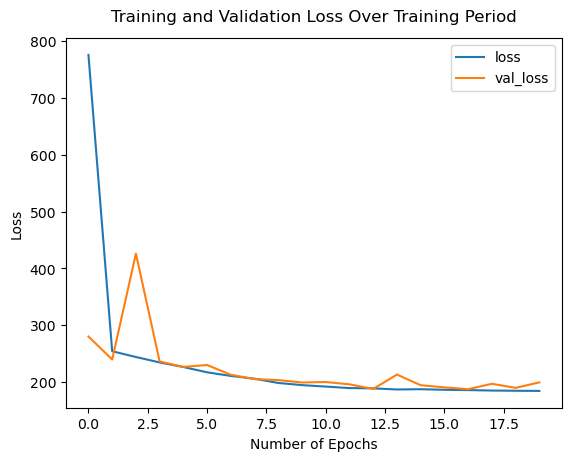

In [33]:
model_df = pd.DataFrame(history4.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

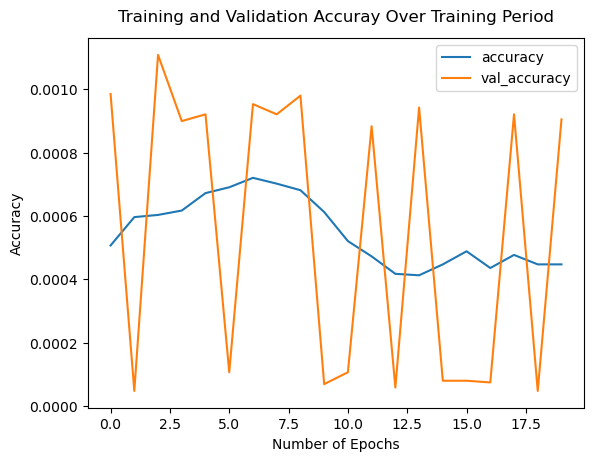

In [34]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.55524%, st_er: 0.001131%
y = 0.3264*x + 7.3193


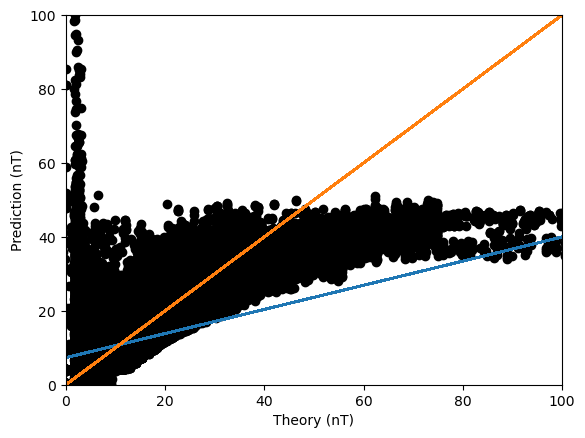

In [42]:
x = y_test.flatten()
y = test_pred4.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred4,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output image data

In [115]:
df['predict'] = test_pred
df_test['predict'] = test_pred2
df_55['predict'] = test_pred3
df_on['predict'] = test_pred4

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_55[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn4.txt", df_on[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")